In [1]:
from simplekit import SimpleKit
import numpy
import queue
import random
import matplotlib.pyplot as plt
import math
import yaml

In [2]:
with open('configDist.yaml', 'r') as file:
    doc = yaml.safe_load(file)
print(doc)

{'arrivalRate': 1, 'svcRate': 'unif'}


In [3]:
doc[0]

KeyError: 0

In [4]:
runs = 5

In [5]:
for yamlDoc in range(0, len(doc)):
    for num in range(1,runs):
        print("run:",num,"doc:",yamlDoc,"-->",doc[yamlDoc]["arrivalRate"], doc[yamlDoc]["svcRate"])

KeyError: 0

In [7]:
for num in range(0,runs):
    print("run:",num,"-->",doc["arrivalRate"], doc["svcRate"])

run: 0 --> 1 unif
run: 1 --> 1 unif
run: 2 --> 1 unif
run: 3 --> 1 unif
run: 4 --> 1 unif


In [10]:
def getSvcRate(svcRate, svcTime):
    '''returns correct arrival rate formula to use based on svcRate[0] string'''
    if svcRate == "sexp":
        return svcTime*(1-(1/math.sqrt(3))) + math.sqrt(3)/svcTime
    if svcRate == "unif":
        return svcTime
    if svcRate == "tri":
        return 6*svcTime / (9 + math.sqrt(45))
    if svcRate == "exp":
        return 1/svcTime

In [14]:
getSvcRate("tri",1) + 5

5.381966011250105

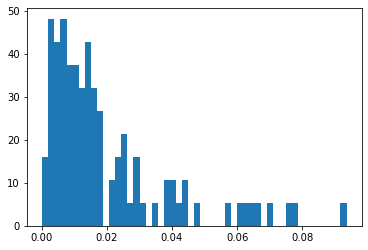

In [278]:
gfg = np.random.pareto(50, 100)
  
plt.figure()
plt.hist(gfg, bins = 50, density = True)
plt.show()

In [279]:
np.average(gfg)

0.01992751538459227

In [280]:
np.median(gfg)

0.01334721059162669

In [2]:
class NamedQueue:
    ctCancel = 0
    
    
    def __init__(self, maxServers = 1, svcRate = 1, arrRate = None, 
                 next = None, prev = None, proficiency = 1, 
                 availability = 1, name = "unknown"):
        if arrRate == None:
            self.meanArrival = None
        else:
            self.meanArrival = 1.0 / arrRate
        self.meanSvc = (1.0 / svcRate) + (1 - availability)*10
        self.numAvailableServers = maxServers
        self.queue = queue.Queue()
        self.next = next
        self.prev = prev
        self.proficiency = proficiency
        self.availability = availability
        self.name = name
        self.supportCancel = NamedQueue.ctCancel


    def push(self, request):
        self.queue.put(request)


    def pop(self):
        if self.queue.empty():
            return None
        else:
            return self.queue.get()

In [3]:
BdeS6Cema_Receive = NamedQueue(maxServers = 5, svcRate = 1.0, arrRate = 4.5, next = "BdeS3_Receive", proficiency = 0.6, name = "BdeS6Cema_Receive")


In [4]:
BdeS3_Receive=NamedQueue(maxServers = 5, svcRate = 1.5, next = "DivS3_Receive", prev = "BdeS6Cema_Receive", name = "BdeS3_Receive")

In [12]:
prevQ = BdeS3_Receive.prev
print(prevQ)
type(prevQ)

BdeS6Cema_Receive


str

In [13]:
x = eval(prevQ)

In [14]:
x.proficiency

0.6

In [15]:
type(x)

__main__.NamedQueue

In [8]:
eval(BdeS6Cema_Receive.next).name

                     


'BdeS3_Receive'

In [109]:
numpy.random.random()

0.8376950428907763

In [117]:
numpy.random.randint(1,5)

2

In [2]:
def sigmoid(x, k=0.1):
    # sigmoid function
    # use k to adjust learning curve slope
    return 1/(1+numpy.exp(-x/k))

In [29]:
print(sigmoid(2))

0.9999999979388463


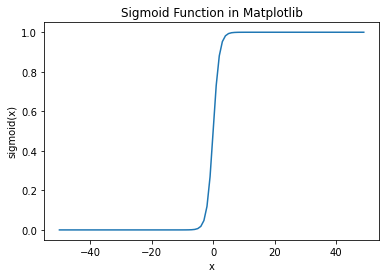

In [3]:
values = numpy.arange(-50, 50, 1)

plt.plot(values, sigmoid(values, 1))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function in Matplotlib')
plt.show()

In [69]:
def get_discrete_cdf(values):
    values = (values - numpy.min(values)) / (numpy.max(values) - numpy.min(values))    
    
    values_sort = numpy.sort(values)
    values_sum = numpy.sum(values)
    
    values_sums = []
    cur_sum = 0
    for it in values_sort:
        cur_sum += it
        values_sums.append(cur_sum)

    cdf = [values_sums[numpy.searchsorted(values_sort, it)]/values_sum for it in values]
    return cdf

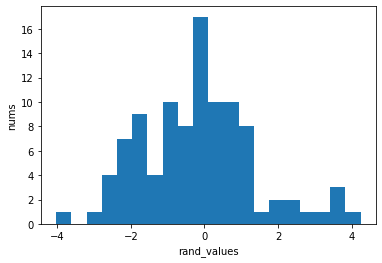

In [67]:
rand_values = [numpy.random.logistic() for _ in range(100)]
_ = plt.hist(rand_values, bins=20)
_ = plt.xlabel("rand_values")
_ = plt.ylabel("nums")

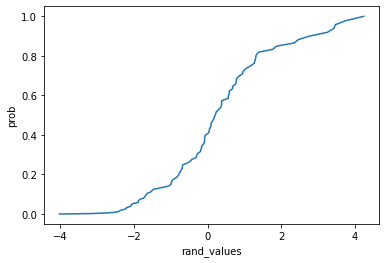

In [70]:
cdf = get_discrete_cdf(rand_values)

x_p = list(zip(rand_values, cdf))
x_p.sort(key=lambda it: it[0])

x = [it[0] for it in x_p]
y = [it[1] for it in x_p]

_ = plt.plot(x, y)
_ = plt.xlabel("rand_values")
_ = plt.ylabel("prob")

In [272]:
x[70]

0.9324552642693861

In [273]:
y[70]

0.6056823958432668

In [71]:
def getDiscreteCdf(values):
    values = (values - numpy.min(values)) / (numpy.max(values) - numpy.min(values))    
    values_sort = numpy.sort(values)
    values_sum = numpy.sum(values)
    values_sums = []
    cur_sum = 0
    for it in values_sort:
        cur_sum += it
        values_sums.append(cur_sum)
    cdf = [values_sums[numpy.searchsorted(values_sort, it)]/values_sum for it in values]
    return cdf

In [81]:
def getLearnCurve():
    rand_values = [numpy.random.logistic() for _ in range(100)]
    cdf = getDiscreteCdf(rand_values)
    x_p = list(zip(rand_values, cdf))
    x_p.sort(key=lambda it: it[0])
    x = [it[0] for it in x_p]
    y = [it[1] for it in x_p]
    return [x,y]


In [87]:
xy = getLearnCurve()

In [9]:
xy[0][70]

0.9753481325342014

In [10]:
xy[1][70]

0.6252038840501758

In [30]:
len(xy[0])

100

In [90]:
print(xy[0][9], xy[1][9])
print(xy[0][19], xy[1][19])
print(xy[0][29], xy[1][29])
print(xy[0][39], xy[1][39])
print(xy[0][49], xy[1][49])
print(xy[0][59], xy[1][59])
print(xy[0][69], xy[1][69])
print(xy[0][79], xy[1][79])
print(xy[0][89], xy[1][89])
print(xy[0][99], xy[1][99])

-2.9205168070381036 0.04955889555776865
-2.1347260523478613 0.12264657685255603
-1.3367588589020605 0.20764107650563066
-0.9132995403894251 0.30014678367852105
-0.7264866154232118 0.3980336380163819
-0.45011861763900823 0.4988948619043204
0.19128783441981487 0.6080408372185337
0.8625792291380585 0.7263933349657314
1.4591048141081864 0.8549553625243909
3.3426059439931053 1.0


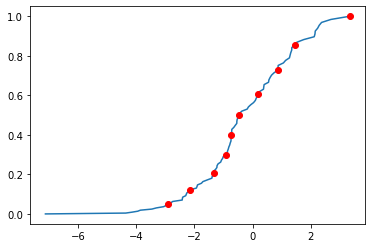

In [88]:
plt.plot(xy[0], xy[1])
plt.plot(xy[0][9], xy[1][9],'ro')
plt.plot(xy[0][19], xy[1][19],'ro')
plt.plot(xy[0][29], xy[1][29],'ro')
plt.plot(xy[0][39], xy[1][39],'ro')
plt.plot(xy[0][49], xy[1][49],'ro')
plt.plot(xy[0][59], xy[1][59],'ro')
plt.plot(xy[0][69], xy[1][69],'ro')
plt.plot(xy[0][79], xy[1][79],'ro')
plt.plot(xy[0][89], xy[1][89],'ro')
plt.plot(xy[0][99], xy[1][99],'ro')

In [46]:
xy[1][89]

0.8308614413228906

(array([ 6.,  7., 14.,  9.,  8., 13., 14.,  9., 12.,  8.]),
 array([ 1.63378773,  3.43378773,  5.23378773,  7.03378773,  8.83378773,
        10.63378773, 12.43378773, 14.23378773, 16.03378773, 17.83378773,
        19.63378773]),
 <BarContainer object of 10 artists>)

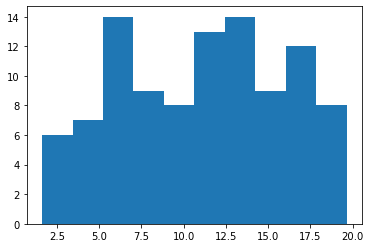

In [254]:
plt.hist(y[70] + numpy.random.randint(1,20, size=100))

In [261]:
x

[-4.141548478169534,
 -3.9635563508483886,
 -3.0607011922292506,
 -2.9475116466458684,
 -2.334003996141683,
 -2.3069304814843106,
 -2.2227746874516816,
 -2.119176264066186,
 -2.043296839333123,
 -2.0021123542326764,
 -1.9991342265831498,
 -1.9672189497773462,
 -1.9666103588541648,
 -1.8453211370059814,
 -1.7478815558201442,
 -1.7396990289724548,
 -1.4041300120269165,
 -1.3095751556734836,
 -1.2181383773643475,
 -1.1921086073203346,
 -1.186360307237796,
 -1.0975163960919305,
 -1.0412332993170605,
 -0.9893362046719929,
 -0.9616690218695695,
 -0.930920920191433,
 -0.9276683469237564,
 -0.9155495077125467,
 -0.8801400010911552,
 -0.8369159925497787,
 -0.6443579734118164,
 -0.5860333009481083,
 -0.5326380543209096,
 -0.41760964513999055,
 -0.37529244803760653,
 -0.3046873957476738,
 -0.2943077103317106,
 -0.2789288365540286,
 -0.27181234239143504,
 -0.2535667152023609,
 -0.23927018855114673,
 -0.23140888666782417,
 -0.19133351067069435,
 -0.17804949077552448,
 -0.15934243991166452,
 -0.1337

In [271]:
learn = [(xy[0][70], xy[1][70])]

In [272]:
learn.append((xy[0][75], xy[1][75]))
learn.append((xy[0][80], xy[1][80]))
learn.append((xy[0][85], xy[1][85]))
learn.append((xy[0][90], xy[1][90]))

In [273]:
learn

[(0.8906796131494101, 0.6212973594612107),
 (0.9868867721914765, 0.6786129473356329),
 (1.1715786397614998, 0.7370358547589689),
 (1.7763076018064066, 0.7983611559047014),
 (2.826855453780786, 0.8671642738801846)]

In [274]:
p = min(learn[1])
p

0.6786129473356329

In [343]:
numpy.min(numpy.where(learn[,1] == p))

SyntaxError: invalid syntax (4182276696.py, line 1)

In [294]:
learn[-1][-2]

1.827772145349107

In [259]:
learn

NameError: name 'learn' is not defined

In [391]:
type(learn)

list

In [288]:
learn[0][1]

0.5961615620715827

In [314]:
def getLearnRate(list):
    ''' This function returns the difference in the y-values of the first
    and last tuple in the array divided by the difference in the x-values of
    the first and last tuple in the array.
    Ex: y1-y0 / x1-x0'''
    if len(list) == 1:
        return 0
    else:
        return (list[0][1] - list[-1][-1]) / (list[0][0] - list[-1][-2])

In [315]:
getLearnRate(learn)

0.2166959297322527

In [395]:
learn2 = [(xy[0][70], xy[1][70])]
len(learn2)

1

In [398]:
learn2[0][1]

0.5961615620715827

In [392]:
type(learn2)

tuple

In [394]:
learn2

(0.6748731140235449, 0.5961615620715827)

In [319]:
def setupQ():
    return numpy.random.randint(1,100), getLearnCurve()

In [320]:
i, learn = setupQ()

In [386]:
learn[1]

(0.9416493929407044, 0.6551127602263174)

In [322]:
learn

[[-5.181177556469521,
  -3.9674785266413957,
  -3.393783297950497,
  -2.2777271298226998,
  -2.2467974153052173,
  -2.2357762072079215,
  -2.195600310930999,
  -2.183453926422259,
  -2.0680908168355328,
  -1.9487452275271708,
  -1.9253671387574673,
  -1.869274032793559,
  -1.659671591989096,
  -1.527807407509318,
  -1.4043024667962658,
  -1.390574078044166,
  -1.3371165192676544,
  -1.32992327093484,
  -1.2612828776669525,
  -1.1672867596832288,
  -1.1325901294157952,
  -1.115017757614518,
  -1.017774738478044,
  -0.9719763270503238,
  -0.8843321454954601,
  -0.8698702145846788,
  -0.8442944599460859,
  -0.8366574044455857,
  -0.7925667465395896,
  -0.7478523530137845,
  -0.7464498145467426,
  -0.7377334873889326,
  -0.7252746608025793,
  -0.7214828148137546,
  -0.6763622176294505,
  -0.6714881081232722,
  -0.5722612731466502,
  -0.556652468299003,
  -0.4467479358901597,
  -0.35781227708628766,
  -0.30574892831650263,
  -0.22225396658513083,
  -0.21454038369851489,
  -0.211966948225455

In [3]:
x = min(1,5)
x

1

In [16]:
norms = numpy.random.normal(30,7,1000)

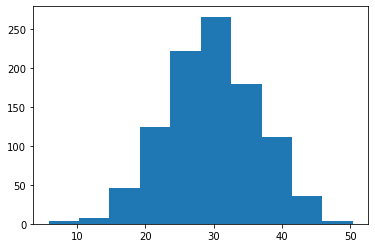

In [17]:
plt.figure()
plt.hist(norms)
plt.show()

In [18]:
norms < 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [4]:
numpy.random.exponential(math.sqrt(3)/6)

0.05640303415828901

In [17]:
numpy.random.triangular?

In [ ]:
myD = {}
myD["BdeS6Cema"] = 0.75
myD["BdeS3"] = 0.50
myD["DivG3"] = 0.25

In [46]:
[*myD.values()]

[0.75, 0.5, 0.25]

In [30]:
keys = [*myD]
keys

['BdeS6Cema', 'BdeS3', 'DivG3']

In [31]:
type(keys)

list

In [38]:
[sum(myD.values()) / len(myD.values()), sum(myD.values()) / len(myD.values())]

[0.5, 0.5]

In [4]:
def setupOutput():
    ''' returns dictonary for output state variables'''
    outputDict = {}
    outputDict["BdeS6Cema_Receive"] = 0   
    outputDict["BdeS3_Receive"] = 0
    outputDict["DivG3_Receive"] = 0
    outputDict["CorpsG3_Receive"] = 0
    outputDict["JTFHQ_Receive"] = 0
    outputDict["COIPE_Receive"] = 0
    outputDict["JFHQC_Receive"] = 0
    outputDict["USCYBERCOM_Receive"] = 0
    outputDict["ARCYBER_Approved"] = 0
    outputDict["JTFtask_Approved"] = 0
    outputDict["CorpsG3_Approved"] = 0
    outputDict["DivG3_Approved"] = 0
    outputDict["BdeS3_Approved"] = 0
    outputDict["BdeS6Cema_Approved"] = 0
    return outputDict



In [5]:
list2 = setupOutput()
name = 'BdeS6Cema_Receive'
list2

{'BdeS6Cema_Receive': 0,
 'BdeS3_Receive': 0,
 'DivG3_Receive': 0,
 'CorpsG3_Receive': 0,
 'JTFHQ_Receive': 0,
 'COIPE_Receive': 0,
 'JFHQC_Receive': 0,
 'USCYBERCOM_Receive': 0,
 'ARCYBER_Approved': 0,
 'JTFtask_Approved': 0,
 'CorpsG3_Approved': 0,
 'DivG3_Approved': 0,
 'BdeS3_Approved': 0,
 'BdeS6Cema_Approved': 0}

In [7]:
for name in list2:
    print(list2.values())

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [2]:
with open ("nolhs.txt", "r") as file:
    i = 0
    for row in file:
        i+= 1
        a, b, c, d, e, f, g, h = row.split()
        dist=""
        if b=="1":
            dist="sexp"
        if b=="2":
            dist="tri"
        if b=="3":
            dist="unif"
        if b=="4":
            dist="exp"
        print("### DP",i)
        print("- arrivalRate: !!float", a)
        print("  svcDist:", dist)
        print("  meanSvc:", c)
        print("  maxServers: !!int", d)
        print("  availability: !!float", e)
        print("  retainRate: !!float", f)
        print("  incrementMin: !!int", g)
        print("  incrementRange: !!int", h)
        print()

### DP 1
- arrivalRate: !!float 2.0
  svcDist: sexp
  meanSvc: 1.756
  maxServers: !!int 1
  availability: !!float 0.82
  retainRate: !!float 0.66
  incrementMin: !!int 14
  incrementRange: !!int 24

### DP 2
- arrivalRate: !!float 1.826
  svcDist: exp
  meanSvc: 0.51
  maxServers: !!int 2
  availability: !!float 0.55
  retainRate: !!float 0.37
  incrementMin: !!int 15
  incrementRange: !!int 16

### DP 3
- arrivalRate: !!float 1.768
  svcDist: tri
  meanSvc: 3.626
  maxServers: !!int 1
  availability: !!float 0.27
  retainRate: !!float 0.64
  incrementMin: !!int 14
  incrementRange: !!int 3

### DP 4
- arrivalRate: !!float 1.188
  svcDist: exp
  meanSvc: 4.0
  maxServers: !!int 2
  availability: !!float 0.86
  retainRate: !!float 0.35
  incrementMin: !!int 16
  incrementRange: !!int 4

### DP 5
- arrivalRate: !!float 1.884
  svcDist: sexp
  meanSvc: 1.881
  maxServers: !!int 1
  availability: !!float 0.7
  retainRate: !!float 0.72
  incrementMin: !!int 8
  incrementRange: !!int 29

##